# Load CICIDS2017 Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

def load_ids_data():
    return pd.read_csv("/content/drive/MyDrive/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")

ids = load_ids_data()
ids.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,07/07/2017 3:30,3,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,07/07/2017 3:30,109,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,07/07/2017 3:30,52,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,07/07/2017 3:30,34,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,07/07/2017 3:30,3,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


## Data Pre-Processing

## Step 1: Remove Infinity and Null values
- Manually changes infinity to 1234567 and NaN to -1234567 in excel because ids.replace() did not work effectively.
- Used the code below to filter out the rows with infinity and null values

In [ ]:
# replacing infinity to np.inf

import numpy as np

#ids.replace('Infinity', 1234567, inplace=True)

#ids.replace('NaN', -1234567, inplace=True)

print(ids[ids.isin([1234567, -1234567]).any(axis=1)])
for i in ids.iloc[14739]:
    print(i)
ids = ids[~ids.isin([1234567, -1234567]).any(axis=1)]




                                          Flow ID       Source IP  \
65         185.86.137.17-192.168.10.5-443-55043-6   185.86.137.17   
1767     149.174.66.134-192.168.10.16-443-60018-6  149.174.66.134   
1890      172.217.12.142-192.168.10.14-80-57855-6   192.168.10.14   
3375        192.168.10.5-54.76.211.99-55251-443-6    192.168.10.5   
6796       192.168.10.16-198.54.12.145-36812-80-6   198.54.12.145   
...                                           ...             ...   
749120     151.101.22.2-192.168.10.25-443-63344-6   192.168.10.25   
749769      192.168.10.17-27.0.237.143-47037-80-6    27.0.237.143   
751304  151.101.208.166-192.168.10.12-443-38764-6   192.168.10.12   
751978     192.168.10.14-52.24.31.137-51539-443-6    52.24.31.137   
753251   192.168.10.12-23.194.141.179-44576-443-6   192.168.10.12   

         Source Port   Destination IP   Destination Port   Protocol  \
65               443     192.168.10.5              55043          6   
1767             443    192.1

## Validation of previous step
- Checking if null-valued rows exist in the dataset
- incomplete_rows represent rows that have atleast one null value
- Expected value of incomplete_rows is 0.

In [ ]:
# Finding the missing valued rows.
incomplete_rows = ids[ids.isnull().any(axis=1)]

incomplete_rows


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [ ]:

print(ids.columns)
# Finding the cramer v value for categorical correlation with the output label.
from scipy.stats.contingency import association

flow_pred = {'flow_id_feature': ids['Flow ID'],
'classification_feature': ids[' Label']
}

flow_pred_source_ip = {'Source_IP': ids[' Source IP'],
'classification_feature': ids[' Label']
}

flow_pred_3 = {'Destination_IP': ids[' Destination IP'],
'classification_feature': ids[' Label']
}

flow_pred_4 = {'Source_Port': ids[' Source Port'],
'classification_feature': ids[' Label']
}

flow_pred_5 = {'Destination_Port': ids[' Destination Port'],
'classification_feature': ids[' Label']
}

flow_pred_6 = {'Protocol': ids[' Protocol'],
'classification_feature': ids[' Label']
}

#l = association(pd.DataFrame(flow_pred).to_numpy(), method = "cramer")



frame = pd.DataFrame(flow_pred)



frame2 = pd.DataFrame(flow_pred_source_ip)

frame3 = pd.DataFrame(flow_pred_3)
frame4 = pd.DataFrame(flow_pred_4)
frame5 = pd.DataFrame(flow_pred_5)
frame6 = pd.DataFrame(flow_pred_6)


contingency_table = pd.crosstab(frame['flow_id_feature'], frame['classification_feature'])

contingency_table2 = pd.crosstab(frame2['Source_IP'], frame2['classification_feature'])

contingency_table3 = pd.crosstab(frame3['Destination_IP'], frame2['classification_feature'])
contingency_table4 = pd.crosstab(frame4['Source_Port'], frame2['classification_feature'])
contingency_table5 = pd.crosstab(frame5['Destination_Port'], frame2['classification_feature'])
contingency_table6 = pd.crosstab(frame6['Protocol'], frame2['classification_feature'])

all_values = contingency_table.values

all_values2 = contingency_table2.values

all_values3 = contingency_table3.values
all_values4 = contingency_table4.values
all_values5 = contingency_table5.values
all_values6 = contingency_table6.values


new_value = association(all_values, method = "cramer")

new_value2 = association(all_values2, method = "cramer")

new_value3 = association(all_values3, method = "cramer")
new_value4 = association(all_values4, method = "cramer")
new_value5 = association(all_values5, method = "cramer")
new_value6 = association(all_values6, method = "cramer")


print("new_value1", new_value)
print("new_value2", new_value2)

print("new_value3", new_value3)
print("new_value4", new_value4)
print("new_value5", new_value5)
print("new_value6", new_value6)

#add for destination ip




Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

## Step 2: Drop Columns that will not be very useful in predicting the output Label.
- Remove columns named `Flow ID`, `Source IP`, `Destination IP`, `Timestamp`
- Used the code below to filter out the rows with infinity and null values

In [ ]:
new_data = ids
print(new_data.columns)

new_data.drop("Flow ID", axis=1, inplace=True)

new_data.drop(" Source IP", axis=1, inplace=True)

new_data.drop(" Destination IP", axis=1, inplace=True)

new_data.drop(" Timestamp", axis=1, inplace=True)



Index(['Flow ID', ' Source IP', ' Source Port', ' Destination IP',
       ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

## Step 3: Changing Categorical output label to numbers.
- Replacing a `BENIGN` label with a 0.
- Replacing a `DDoS` label with a 1.

In [ ]:

new_data.replace('BENIGN', 0, inplace=True)
new_data.replace('DDoS', 1, inplace=True)

<ipython-input-7-db1c9bf08ea2>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data.replace('DDoS', 1, inplace=True)


## Step 4: Performing Scaling using Standard Scaler (##Citation)
- Scaling all the numerical rows with the help of the standard scaler. (CITATION)


In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler_scaling = StandardScaler()
output_label = new_data[' Label']
new_data.drop(' Label', axis=1, inplace=True)
scaled_data = standard_scaler_scaling.fit_transform(new_data)

for i in range(len(scaled_data[0])):
    print(scaled_data[0][i], " ", new_data.columns[i])



-1.635521094338953    Source Port
2.1392766095626037    Destination Port
-0.7172239042026048    Protocol
-0.4084330739684499    Flow Duration
-0.009025051790975272    Total Fwd Packets
-0.00961218744480784    Total Backward Packets
-0.11648837200903685   Total Length of Fwd Packets
-0.006398585806875391    Total Length of Bwd Packets
-0.2631624758589712    Fwd Packet Length Max
-0.17544629845203358    Fwd Packet Length Min
-0.2707549025124376    Fwd Packet Length Mean
-0.22797425704894098    Fwd Packet Length Std
-0.4629620686954722   Bwd Packet Length Max
-0.5708655972208654    Bwd Packet Length Min
-0.5199022128952837    Bwd Packet Length Mean
-0.4190426883762597    Bwd Packet Length Std
0.11921012033641289   Flow Bytes/s
2.959623126973493    Flow Packets/s
-0.26954885886273267    Flow IAT Mean
-0.3518284874256312    Flow IAT Std
-0.3679768720499291    Flow IAT Max
-0.06536224505734568    Flow IAT Min
-0.3945526176470602   Fwd IAT Total
-0.24453660986805287    Fwd IAT Mean
-0.3262632

In [ ]:
data_scaled_frame = pd.DataFrame(scaled_data, columns = new_data.columns)


data_scaled_frame = data_scaled_frame.assign(Label = output_label)

print(data_scaled_frame)

         Source Port   Destination Port   Protocol   Flow Duration  \
0          -1.635521           2.139277  -0.717224       -0.408433   
1          -1.650637           2.148310  -0.717224       -0.408430   
2          -1.650637           2.148358  -0.717224       -0.408431   
3          -1.635521           1.726845  -0.717224       -0.408432   
4          -1.635521           2.139181  -0.717224       -0.408433   
...              ...                ...        ...             ...   
755187     -1.513180          -0.461877  -0.717224       -0.407803   
755188      0.910581          -0.480517   1.391697       -0.406389   
755189      0.503081          -0.480517   1.391697       -0.408428   
755190      0.759090          -0.480517   1.391697       -0.408428   
755191     -1.635521           2.021460  -0.717224       -0.408433   

         Total Fwd Packets   Total Backward Packets  \
0                -0.009025                -0.009612   
1                -0.010363                -0.0085

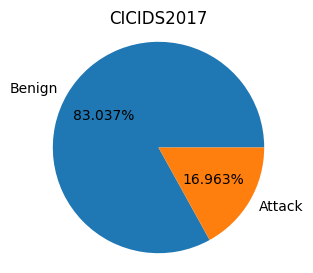

In [ ]:
values = data_scaled_frame['Label'].value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(3,3))
plt.pie(values, labels = ['Benign', 'Attack'], autopct='%3.3f%%')
plt.axis('equal')
plt.title('CICIDS2017')
plt.show()

In [ ]:
data_scaled_frame[data_scaled_frame['Label'] == 0].shape

(626696, 81)

In [ ]:
data_scaled_frame[data_scaled_frame['Label'] == 1].shape

(128025, 81)

#Feature Selection Algorithm

## Stage 1 Correlation Values and their log base 10 values found
  - Find the pearson correlation between each feature and the output label and store it in a list named `pearson_values`
  - Find the Spearman correlation between each feature and the output label and store it in a list named `s_values`
  - Find the Kendall Tau correlation between each feature and the output label and store it in a list named `k_values`

In [ ]:
import math
incomplete_rows = new_data[new_data.isnull().any(axis=1)]

#print(incomplete_rows)


correlation_matrix_ids = data_scaled_frame.corr() # correaltion of different features with the median_house_value
nan_features = []
linear_features = []
non_linear_features = []

sample_dataframe = data_scaled_frame.copy(deep=True)

l = correlation_matrix_ids["Label"].sort_values(ascending=False)
pearson_values = []
for _, score in l.items():
    if (score!=1 and score>0):
      pearson_values.append(math.log10(score))
    elif score < 0:
      pearson_values.append(score)

In [ ]:
from scipy.stats import spearmanr, kendalltau

spearman_values = data_scaled_frame.corr(method='spearman')["Label"].sort_values(ascending=False)
kendall_values = data_scaled_frame.corr(method='kendall')["Label"].sort_values(ascending=False)

In [ ]:
s_values = []
k_values = []

for name,score in spearman_values.items():
    if (score!=1 and score>0):
      s_values.append(math.log10(score))
    elif score < 0:
        s_values.append(score)

for name,score in kendall_values.items():
    if (score!=1 and score>0):
      k_values.append(math.log10(score))
    elif score < 0:
      k_values.append(score)

col_headings = ['Pearson', 'Spearman', 'Kendall']
combined_lists = [pearson_values, s_values, k_values]

## Stage 2 - Composition of Correlation Functions
  - The three types of correlation coefficients values found will be used to create a new dataframe, with 3 columns: Pearson, Spearman, and Kendall.
  - Now, the shape of this dataframe is `number_of_features * 3`.
  - Now, 3 values are found: Pearson correlation between Spearman and Kendall columns, Spearman correlation between Pearson and Kendall columns, and Kendall correlation between Pearson and Spearman columns.

In [ ]:
frame_final = pd.DataFrame(combined_lists).T
frame_final.columns = col_headings

correlation_matrix_ids = frame_final.corr() # correaltion of different features with the median_house_value
l = correlation_matrix_ids["Kendall"].sort_values(ascending=False)
spearman_values_second = frame_final.corr(method='spearman')["Kendall"].sort_values(ascending=False)
kendall_values_second = frame_final.corr(method='kendall')["Pearson"].sort_values(ascending=False)

final_values = []

count = 0
for _, score1 in l.items():
    if count == 0:
        final_values.append(score1)
    count+=1

count = 0

for _, score2 in spearman_values_second.items():
    if count == 0:
        final_values.append(score2)
    count+=1
count = 0

for _, score3 in kendall_values_second.items():
    if count == 1:
        final_values.append(score3)
    count+=1

threshold1 = sum(final_values)/len(final_values)

In [ ]:
threshold1 = min(threshold1, min(final_values))

In [ ]:
threshold1 = min(threshold1, 1-threshold1)

In [ ]:
threshold1

0.2860107928601079

## Stage 3: Loading the dataset again to perform Mutual Information Gain on it.

In [ ]:

final_dataset = load_ids_data()



final_dataset = final_dataset[~final_dataset.isin([1234567]).any(axis=1)]


In [ ]:
categorical_columns = ['Flow ID', ' Source IP', ' Destination IP', ' Source Port', ' Destination Port', ' Protocol']



In [ ]:
final_dataset.shape


(755192, 85)

In [ ]:
final_dataset.drop(" Timestamp", axis=1, inplace=True)
final_dataset.drop("Flow ID", axis=1, inplace=True)
final_dataset.drop(" Source IP", axis=1, inplace=True)
final_dataset.drop(" Destination IP", axis=1, inplace=True)

In [ ]:
final_clean = final_dataset.dropna(axis=1)

In [ ]:
final_clean.replace('BENIGN', 0, inplace=True)
final_clean.replace('DDoS', 1, inplace=True)

<ipython-input-25-36dfece7bbed>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_clean.replace('DDoS', 1, inplace=True)


In [ ]:
from sklearn.feature_selection import mutual_info_classif

info_gain = mutual_info_classif(final_clean, final_clean[' Label'])





In [ ]:
print(sum(info_gain)/(len(info_gain)))

0.1715087292126784


In [ ]:
scores = pd.DataFrame({'feature':final_clean.columns, 'score':info_gain})

scores = scores.sort_values(by = 'score', ascending=False)

In [ ]:
print(sum(list(scores['score']))/len(list(scores['score'])))

0.17150872921267843


In [ ]:
print(list(scores['feature']))

[' Label', ' Subflow Fwd Bytes', 'Total Length of Fwd Packets', ' Average Packet Size', ' Fwd Packet Length Mean', ' Avg Fwd Segment Size', ' Fwd Packet Length Max', ' Fwd Header Length.1', ' Fwd Header Length', ' Avg Bwd Segment Size', ' Bwd Packet Length Mean', ' Packet Length Mean', ' Total Length of Bwd Packets', ' Subflow Bwd Bytes', 'Fwd IAT Total', 'Init_Win_bytes_forward', ' Fwd IAT Max', 'Bwd Packet Length Max', ' Destination Port', ' Packet Length Std', ' Packet Length Variance', ' Fwd IAT Mean', ' Max Packet Length', ' Bwd Header Length', ' Fwd IAT Std', ' Fwd Packet Length Std', ' Bwd Packet Length Std', ' Init_Win_bytes_backward', ' Total Fwd Packets', 'Subflow Fwd Packets', ' Flow IAT Max', ' act_data_pkt_fwd', ' Flow Duration', ' Flow IAT Std', ' Subflow Bwd Packets', ' Total Backward Packets', 'Fwd Packets/s', 'Flow Bytes/s', ' Bwd Packets/s', ' Flow Packets/s', ' Bwd IAT Max', ' Flow IAT Mean', 'Bwd IAT Total', ' Bwd IAT Mean', ' Protocol', ' Bwd IAT Std', ' Active Min

## Selecting only the features above the threshold value `threshold1`

In [ ]:
final_info_gain = []
for i in range(len(list(scores['feature']))):
    if i!=0:
        if list(scores['score'])[i] > threshold1:
            final_info_gain.append(list(scores['feature'])[i])
print(final_info_gain)
print(len(final_info_gain))

[' Subflow Fwd Bytes', 'Total Length of Fwd Packets', ' Average Packet Size', ' Fwd Packet Length Mean', ' Avg Fwd Segment Size', ' Fwd Packet Length Max', ' Fwd Header Length.1', ' Fwd Header Length', ' Avg Bwd Segment Size', ' Bwd Packet Length Mean', ' Packet Length Mean', ' Total Length of Bwd Packets', ' Subflow Bwd Bytes', 'Fwd IAT Total', 'Init_Win_bytes_forward', ' Fwd IAT Max', 'Bwd Packet Length Max', ' Destination Port']
18


In [ ]:
sub = final_info_gain

In [ ]:

for i in range(len(sub)):
    feat = sub[i]
    list(scores['feature']).index(sub[i])
    print(sub[i], " ", list(scores['score'])[i])
#print(final_info_gain)
#print(len(final_info_gain))

 Subflow Fwd Bytes   0.4696376594331605
Total Length of Fwd Packets   0.41597622169009396
 Average Packet Size   0.4159389227414081
 Fwd Packet Length Mean   0.4121932193098643
 Avg Fwd Segment Size   0.3371967699870635
 Fwd Packet Length Max   0.33713550250857205
 Fwd Header Length.1   0.333636956143363
 Fwd Header Length   0.32232587238912513
 Avg Bwd Segment Size   0.3223182680389567
 Bwd Packet Length Mean   0.3143355213415302
 Packet Length Mean   0.3140536754723269
 Total Length of Bwd Packets   0.3139921256672913
 Subflow Bwd Bytes   0.31318634375702925
Fwd IAT Total   0.312861272900989
Init_Win_bytes_forward   0.30778788383094624
 Fwd IAT Max   0.30642393696245196
Bwd Packet Length Max   0.3045483844656818
 Destination Port   0.29987460780222586


# Training Models

In [ ]:
X_Selected = final_dataset[sub]


In [ ]:
X_Selected

,Subflow Fwd Bytes,Total Length of Fwd Packets,Average Packet Size,Fwd Packet Length Mean,Avg Fwd Segment Size,Fwd Packet Length Max,Fwd Header Length.1,Fwd Header Length,Avg Bwd Segment Size,Bwd Packet Length Mean,Packet Length Mean,Total Length of Bwd Packets,Subflow Bwd Bytes,Fwd IAT Total,Init_Win_bytes_forward,Fwd IAT Max,Bwd Packet Length Max,Destination Port
0,12,12,9.0,6.0,6.0,6,40,40,0.0,0.0,6.0,0.0,0,3.0,33,3.0,0,54865
1,6,6,9.0,6.0,6.0,6,20,20,6.0,6.0,6.0,6.0,6,0.0,29,0.0,6,55054
2,6,6,9.0,6.0,6.0,6,20,20,6.0,6.0,6.0,6.0,6,0.0,29,0.0,6,55055
3,6,6,9.0,6.0,6.0,6,20,20,6.0,6.0,6.0,6.0,6,0.0,31,0.0,6,46236
4,12,12,9.0,6.0,6.0,6,40,40,0.0,0.0,6.0,0.0,0,3.0,32,3.0,0,54863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755658,6,6,9.0,6.0,6.0,6,20,20,6.0,6.0,6.0,6.0,6,0.0,0,0.0,6,443
755659,80,80,69.0,40.0,40.0,40,64,64,78.0,78.0,55.2,156.0,156,3.0,-1,3.0,78,53
755660,64,64,48.0,32.0,32.0,32,64,64,48.0,48.0,38.4,96.0,96,3.0,-1,3.0,48,53
755661,80,80,66.0,40.0,40.0,40,40,40,72.0,72.0,52.8,144.0,144,3.0,-1,3.0,72,53


## Random Forest Model

In [69]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_Selected, final_clean[' Label'] , test_size = 0.3, random_state=42)

In [ ]:
import time

In [70]:
rf = RandomForestClassifier(n_estimators = 100, random_state=42)
s_t = time.time()
rf.fit(X_train, y_train)
e_t = time.time()

total = e_t - s_t


In [71]:
total

79.05096912384033

In [72]:
len(X_test)

226558

In [73]:
y_pred = rf.predict(X_test)

In [74]:
accuracy = accuracy_score(y_test, y_pred)

In [75]:
accuracy

0.9999249640268717

In [76]:
mae_error_rf = mean_absolute_error(y_test, y_pred)
mae_error_rf

7.503597312829386e-05

In [77]:
from sklearn.metrics import confusion_matrix

In [78]:
mae_error_rf = mean_absolute_error(y_test, y_pred)


In [79]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
report

{'0': {'precision': 0.9999149876732126,
  'recall': 0.9999946863060794,
  'f1-score': 0.9999548354016062,
  'support': 188193.0},
 '1': {'precision': 0.9999739243807041,
  'recall': 0.9995829532125635,
  'f1-score': 0.9997784005735515,
  'support': 38365.0},
 'accuracy': 0.9999249640268717,
 'macro avg': {'precision': 0.9999444560269584,
  'recall': 0.9997888197593214,
  'f1-score': 0.9998666179875788,
  'support': 226558.0},
 'weighted avg': {'precision': 0.9999249679289658,
  'recall': 0.9999249640268717,
  'f1-score': 0.9999249581861545,
  'support': 226558.0}}

In [91]:
import joblib, os
joblib.dump(rf, '/content/drive/MyDrive/rf_ids.pkl')
size = os.path.getsize('/content/drive/MyDrive/rf_ids.pkl')
print("The size of the Random Forest model is: ", size/(1024**2), "MB")

The size of the Random Forest model is:  1.5206995010375977 MB


##Decision Trees

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error

In [60]:
dt = DecisionTreeClassifier(random_state=42)
s_t = time.time()
dt.fit(X_train, y_train)
e_t = time.time()

In [61]:
total = e_t - s_t
total

5.1448657512664795

In [62]:
y_prediction_dt = dt.predict(X_test)

In [63]:
acc_dt = accuracy_score(y_test, y_prediction_dt)

In [64]:
acc_dt

0.9998852390999214

In [65]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_prediction_dt, output_dict=True)

In [66]:
report

{'0': {'precision': 0.9999043585915208,
  'recall': 0.9999574904486351,
  'f1-score': 0.9999309238142807,
  'support': 188193.0},
 '1': {'precision': 0.9997914222396037,
  'recall': 0.9995308223641339,
  'f1-score': 0.9996611053180396,
  'support': 38365.0},
 'accuracy': 0.9998852390999214,
 'macro avg': {'precision': 0.9998478904155623,
  'recall': 0.9997441564063845,
  'f1-score': 0.9997960145661602,
  'support': 226558.0},
 'weighted avg': {'precision': 0.9998852341150455,
  'recall': 0.9998852390999214,
  'f1-score': 0.9998852331451881,
  'support': 226558.0}}

In [67]:
mae_error_dt = mean_absolute_error(y_test, y_prediction_dt)
mae_error_dt

0.00011476090007856708

In [92]:
import joblib, os
joblib.dump(dt, '/content/drive/MyDrive/dt_ids.pkl')
size = os.path.getsize('/content/drive/MyDrive/dt_ids.pkl')
print("The size of the decision trees model is: ", size/(1024**2), "MB")

The size of the decision trees model is:  0.015648841857910156 MB


##XGBoost

In [ ]:
import xgboost
import time

In [ ]:
xg = xgboost.XGBClassifier(objective='binary:logistic')

s_t = time.time()
xg.fit(X_train, y_train)
e_t = time.time()

In [ ]:
total = e_t - s_t
total

5.965520858764648

In [ ]:
y_pred_xg = xg.predict(X_test)

In [ ]:
acc_xg = accuracy_score(y_test, y_pred_xg)

In [ ]:
acc_xg

0.9999249640268717

In [ ]:
mae_error_xg = mean_absolute_error(y_test, y_pred_xg)
mae_error_xg

7.503597312829386e-05

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_xg, output_dict=True)
report

{'0': {'precision': 0.9999203000967025,
  'recall': 0.9999893726121588,
  'f1-score': 0.9999548351616238,
  'support': 188193.0},
 '1': {'precision': 0.999947851481018,
  'recall': 0.9996090186367783,
  'f1-score': 0.9997784063506133,
  'support': 38365.0},
 'accuracy': 0.9999249640268717,
 'macro avg': {'precision': 0.9999340757888602,
  'recall': 0.9997991956244685,
  'f1-score': 0.9998666207561185,
  'support': 226558.0},
 'weighted avg': {'precision': 0.9999249656077825,
  'recall': 0.9999249640268717,
  'f1-score': 0.9999249589650895,
  'support': 226558.0}}

In [ ]:
xg.get_booster().get_score(importance_type = 'weight')

{' Subflow Fwd Bytes': 65.0,
 ' Average Packet Size': 123.0,
 ' Fwd Packet Length Mean': 23.0,
 ' Fwd Packet Length Max': 32.0,
 ' Fwd Header Length.1': 54.0,
 ' Avg Bwd Segment Size': 45.0,
 ' Packet Length Mean': 20.0,
 ' Total Length of Bwd Packets': 56.0,
 'Fwd IAT Total': 173.0,
 'Init_Win_bytes_forward': 199.0,
 ' Fwd IAT Max': 170.0,
 'Bwd Packet Length Max': 9.0,
 ' Destination Port': 105.0}

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_xg = confusion_matrix(y_test, y_pred_xg)

In [ ]:
import numpy as np

In [ ]:
total_value = np.sum(confusion_matrix_xg)
confusion_matrix_xg = (confusion_matrix_xg/total_value)*100

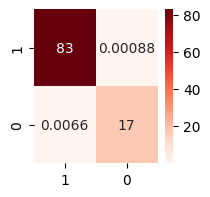

In [ ]:
import matplotlib.pyplot as plt
import seaborn
plt.figure(figsize=(2,2))
seaborn.heatmap(confusion_matrix_xg, annot=True, cmap="Reds", xticklabels=['1', '0'], yticklabels=['1', '0'])
plt.show()

In [93]:
import joblib, os
joblib.dump(xg, '/content/drive/MyDrive/xg_ids.pkl')
size = os.path.getsize('/content/drive/MyDrive/xg_ids.pkl')
print("The size of the XGBoost model is: ", size/(1024**2), "MB")

The size of the XGBoost model is:  0.1402454376220703 MB


##Linear SVC

In [81]:
from sklearn.svm import LinearSVC

In [82]:
lsvm = LinearSVC(random_state = 42)
s_t = time.time()
lsvm.fit(X_train, y_train)
e_t = time.time()

total = e_t - s_t

In [83]:
total

429.6790506839752

In [84]:
y_prediction_lsvm = lsvm.predict(X_test)

In [85]:
acc_lsvm = accuracy_score(y_test, y_prediction_lsvm)

In [86]:
acc_lsvm

0.693451566486286

In [87]:
mae_error_l = mean_absolute_error(y_test, y_prediction_lsvm)
mae_error_l

0.3065484335137139

In [88]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_prediction_lsvm, output_dict=True)
report

{'0': {'precision': 0.9049421618377258,
  'recall': 0.705015595691657,
  'f1-score': 0.7925653133577651,
  'support': 188193.0},
 '1': {'precision': 0.30557153936604037,
  'recall': 0.6367261827186238,
  'f1-score': 0.4129595036641957,
  'support': 38365.0},
 'accuracy': 0.693451566486286,
 'macro avg': {'precision': 0.6052568506018831,
  'recall': 0.6708708892051404,
  'f1-score': 0.6027624085109804,
  'support': 226558.0},
 'weighted avg': {'precision': 0.8034456182103712,
  'recall': 0.693451566486286,
  'f1-score': 0.7282834213526549,
  'support': 226558.0}}

In [94]:
import joblib, os
joblib.dump(lsvm, '/content/drive/MyDrive/LSVM_ids.pkl')
size = os.path.getsize('/content/drive/MyDrive/LSVM_ids.pkl')
print("The size of the Linear SVC model is: ", size/(1024**2), "MB")

The size of the Linear SVC model is:  0.001583099365234375 MB
